#### **Import Library**

In [206]:
import cv2                      # Untuk membaca gambar
import numpy as np              # Untuk manipulasi array dan gambar
import matplotlib.pyplot as plt # Untuk menampilkan gambar
import math                     # Untuk operasi matematika (sqrt)

#### **Membaca dan Mengkonversi Gambar**

In [207]:
img = cv2.imread('cutie.jpg') # Membaca gambar dalam format BGR
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Mengubah BGR menjadi RGB dengan slicing

Menampilkan Ukuran Gambar

In [208]:
# Mendapatkan ukuran gambar
height, width, _ = rgb.shape
print(f"Ukuran gambar: {width} x {height}")

Ukuran gambar: 720 x 720


Menampilkan Gambar Asli

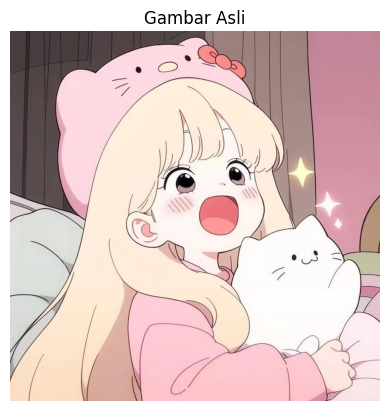

In [209]:
plt.imshow(rgb)
plt.axis('off')
plt.title('Gambar Asli')
plt.show()

#### **Konversi Grayscale**

Fungsi Konversi ke Grayscale dengan Rumus Luminance

In [210]:
def convert_to_grayscale(pixel):
    r, g, b = pixel
    gray = int(0.299 * r + 0.587 * g + 0.114 * b)  # Rumus standar konversi RGB ke grayscale
    return gray

Proses Konversi RGB ke Grayscale

In [211]:
grayscale_img = []
for y in range(height):
    row = []
    for x in range(width):
        pixel = rgb[y, x]  # Ambil pixel di koordinat (y,x)
        r, g, b = pixel
        gray = convert_to_grayscale(pixel)
        row.append(gray)

        # Menampilkan nilai piksel tiap 100 piksel sebagai sampel
        if y % 100 == 0 and x % 100 == 0:
            print(f'Pixel[{y},{x}] -> R: {r}, G: {g}, B: {b}, Gray: {gray}')
    grayscale_img.append(row)

Pixel[0,0] -> R: 72, G: 61, B: 65, Gray: 64
Pixel[0,100] -> R: 74, G: 65, B: 66, Gray: 67
Pixel[0,200] -> R: 81, G: 69, B: 71, Gray: 72
Pixel[0,300] -> R: 47, G: 37, B: 36, Gray: 39
Pixel[0,400] -> R: 156, G: 127, B: 129, Gray: 135
Pixel[0,500] -> R: 153, G: 128, B: 124, Gray: 135
Pixel[0,600] -> R: 193, G: 134, B: 152, Gray: 153
Pixel[0,700] -> R: 193, G: 134, B: 152, Gray: 153
Pixel[100,0] -> R: 81, G: 69, B: 69, Gray: 72
Pixel[100,100] -> R: 251, G: 229, B: 232, Gray: 235
Pixel[100,200] -> R: 253, G: 217, B: 227, Gray: 228
Pixel[100,300] -> R: 84, G: 59, B: 65, Gray: 67
Pixel[100,400] -> R: 58, G: 32, B: 33, Gray: 39
Pixel[100,500] -> R: 160, G: 132, B: 129, Gray: 140
Pixel[100,600] -> R: 199, G: 136, B: 153, Gray: 156
Pixel[100,700] -> R: 199, G: 136, B: 153, Gray: 156
Pixel[200,0] -> R: 86, G: 74, B: 76, Gray: 77
Pixel[200,100] -> R: 224, G: 174, B: 186, Gray: 190
Pixel[200,200] -> R: 255, G: 237, B: 228, Gray: 241
Pixel[200,300] -> R: 255, G: 238, B: 220, Gray: 241
Pixel[200,400]

Konversi Hasil Grayscale ke Array Numpy

In [212]:
grayscale_img = np.array(grayscale_img, dtype=np.int32)
grayscale_img

array([[ 64,  64,  64, ..., 151, 151, 151],
       [ 64,  64,  64, ..., 151, 151, 151],
       [ 64,  64,  64, ..., 151, 151, 151],
       ...,
       [228, 228, 228, ..., 235, 235, 235],
       [228, 228, 228, ..., 235, 235, 235],
       [228, 228, 228, ..., 234, 234, 234]], dtype=int32)

Menampilkan Gambar Hasil Konversi Grayscale

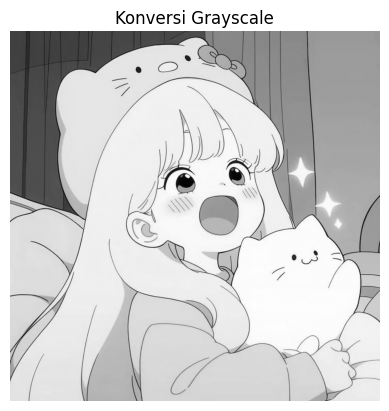

In [213]:
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.title('Konversi Grayscale')
plt.show()

#### **Laplacian of Gaussian (LoG)**

Kernel Gaussian untuk menghaluskan noise

In [214]:
Gaussian = [[1, 2, 1],
            [2, 4, 2],
            [1, 2, 1]]

gaussian_sum = sum(sum(row) for row in Gaussian) # Total bobot = 16

Fungsi Gaussian Blur

In [215]:
def apply_gaussian_blur(img):
    result = np.zeros((height, width), dtype=np.int32)

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            acc = 0
            for i in range(3):
                for j in range(3):
                    acc += Gaussian[i][j] * img[y + i - 1][x + j - 1]
            result[y, x] = int(acc / gaussian_sum)  # Pembagian untuk normalisasi

    return result

Memanggil Fungsi dan Simpan Hasilnya

In [216]:
gaussian_blur = apply_gaussian_blur(grayscale_img)
gaussian_blur

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,  64,  64, ..., 151, 151,   0],
       [  0,  64,  64, ..., 151, 151,   0],
       ...,
       [  0, 228, 228, ..., 235, 235,   0],
       [  0, 228, 228, ..., 234, 234,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int32)

Menampilkan Gambar Hasil Gaussian Blur

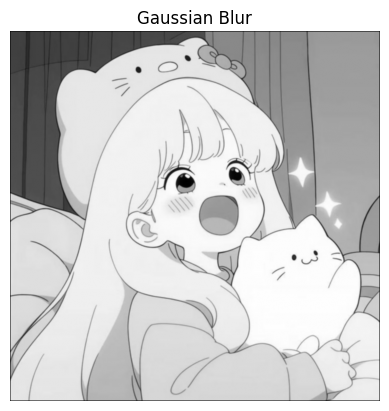

In [217]:
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')
plt.title('Gaussian Blur')
plt.show()

Kernel Laplacian untuk mendeteksi tepi

In [218]:
Laplacian = [[0,  1, 0],
             [1, -4, 1],
             [0,  1, 0]]

Fungsi penerapan operator Laplacian

In [219]:
def apply_laplacian_operator(img):
    # Membuat array kosong untuk menyimpan hasil gradien
    gradient_magnitude = np.zeros((height, width), dtype=np.int32)

    # Loop melewati semua piksel kecuali tepi gambar
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            laplacian_sum = 0  # Penampung akumulasi hasil perkalian kernel

            # Loop kernel 3x3
            for i in range(3):
                for j in range(3):
                    pixel = img[y + i - 1, x + j - 1]   # Ambil nilai piksel tetangga
                    laplacian_sum += Laplacian[i][j] * pixel    # Kalikan dengan bobot kernel Laplacian

            # Hitung nilai absolut hasil konvolusi
            value = abs(laplacian_sum)
            gradient_magnitude[y, x] = min(int(value), 255) # Simpan hasilnya ke array output dengan batas maksimal 255

    return np.clip(gradient_magnitude, 0, 255).astype(np.uint8)

In [220]:
edges = apply_laplacian_operator(gaussian_blur)
edges

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 128,  64, ..., 152, 255,   0],
       [  0,  64,   0, ...,   1, 151,   0],
       ...,
       [  0, 228,   0, ...,   1, 236,   0],
       [  0, 255, 228, ..., 233, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

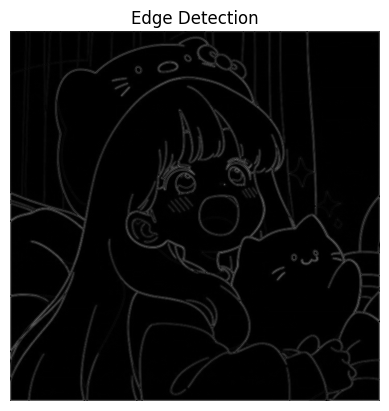

In [221]:
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Edge Detection')
plt.show()